In [1]:
import sys
import os
sys.path.append("..")  # Adds the parent directory to the sys.path

from utitlity_functions import *
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
import cv2 as cv
from matplotlib import cm
import matplotlib.patches as mpatches
from sklearn.cluster import KMeans
from PIL import Image, ImageDraw
from hough_circle_trafo import hough_circle
from confectionery import Confectionery
import seaborn_image as isns
from matplotlib.ticker import MaxNLocator
import matplotlib
from matplotlib.patches import Patch
from background_subtraction_gmm import Backsub as Backsub
from scipy.stats import multivariate_normal
plt.rcdefaults()
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'font.size' : 11,
    'text.usetex': True,
})
from sklearn.cluster import KMeans
np.random.seed(137)




In [2]:
backsub=Backsub("../Video_Data/Gute_aufnahme_shortened.avi", history=100)
backsub.begin_train(max_frames=500)


In [3]:
background=backsub.getBackgroundImage()


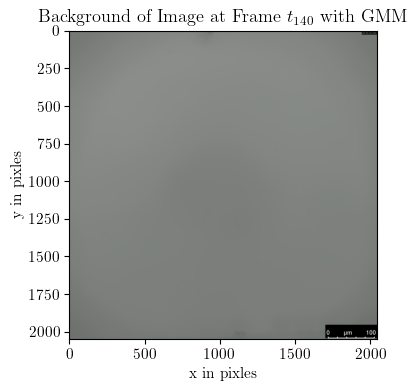

In [4]:
fig=plt.figure()
fig.set_size_inches(10,4) 
ax = fig.gca()
plt.rcParams["figure.figsize"] = (10,4)
plt.title("Background of Image at Frame $t_{140}$ with GMM")
plt.xlabel("x in pixles")
plt.ylabel("y in pixles")
plt.imshow(background, cmap="gray")
plt.show()
ax.set_rasterized(True)
fig.savefig('../export_graphs/backround_image.eps', format="eps", dpi=1200, bbox_inches="tight")

In [5]:
im_paths=np.load("/Users/Hoang_1/Desktop/Master_Arbeit/software/Janus_Particle_Tracking_long_video/data/Gute_aufnahme_shortened/image_paths.npy")
im_0=cv.imread("../"+im_paths[0],cv.IMREAD_GRAYSCALE)
height,width=im_0.shape
mask_scale=np.ones(im_0.shape,dtype=np.bool_)
mask_scale[1953:height-5,1700:width-5]=0
mask_scale[5:24,1941:width-6]=0


A=np.zeros_like(im_0)
A[mask_scale==0]=im_0[mask_scale==0]
scale_values_original=cv.cvtColor(A,cv.COLOR_GRAY2RGB)
X=np.array([cv.imread("../"+x,cv.IMREAD_GRAYSCALE) for x in im_paths[:200]])
X=np.transpose(X,axes=[1,2,0])
im=X[:,:,140].reshape((height,width))

In [6]:
im=cv.cvtColor(im,cv.COLOR_GRAY2BGR)
mask=backsub.getMask(im)
foreground=cv.GaussianBlur(im, ksize=(3,3),sigmaX=0)
foreground[mask==0]=0
A=np.copy(foreground)
A=cv.cvtColor(A,cv.COLOR_BGR2GRAY)

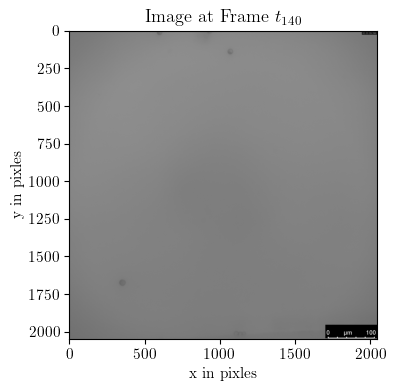

In [7]:
fig=plt.figure()
fig.set_size_inches(10,4) 
ax = fig.gca()
plt.rcParams["figure.figsize"] = (10,4)
plt.title("Image at Frame $t_{140}$")
plt.xlabel("x in pixles")
plt.ylabel("y in pixles")
plt.imshow(im, cmap="gray")
plt.show()
ax.set_rasterized(True)
fig.savefig('../export_graphs/backsub_original_image.eps', format="eps", dpi=1200, bbox_inches="tight")

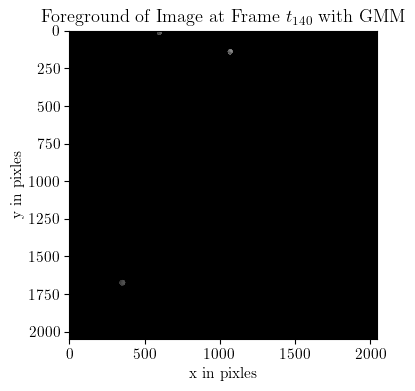

In [7]:
fig=plt.figure()
fig.set_size_inches(10,4) 
ax = fig.gca()
plt.rcParams["figure.figsize"] = (10,4)
plt.title("Foreground of Image at Frame $t_{140}$ with GMM")
plt.xlabel("x in pixles")
plt.ylabel("y in pixles")
plt.imshow(A, cmap="gray",vmin=90,vmax=160)
plt.show()
ax.set_rasterized(True)
fig.savefig('../export_graphs/foreground_image.eps', format="eps", dpi=1200, bbox_inches="tight")

In [8]:
A=np.copy(foreground[110:170,1040:1100])
A=cv.cvtColor(A,cv.COLOR_BGR2GRAY)

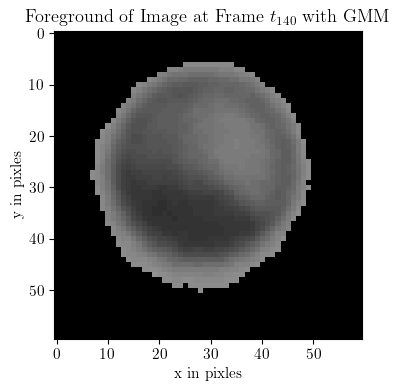

In [9]:
fig=plt.figure()
fig.set_size_inches(10,4) 
ax = fig.gca()
plt.rcParams["figure.figsize"] = (10,4)
plt.title("Foreground of Image at Frame $t_{140}$ with GMM")
plt.xlabel("x in pixles")
plt.ylabel("y in pixles")
plt.imshow(A, cmap="gray",vmin=100,vmax=160)
plt.show()
ax.set_rasterized(True)


In [10]:
A=np.copy(foreground[1640:1700,320:380])
A=cv.cvtColor(A,cv.COLOR_BGR2GRAY)

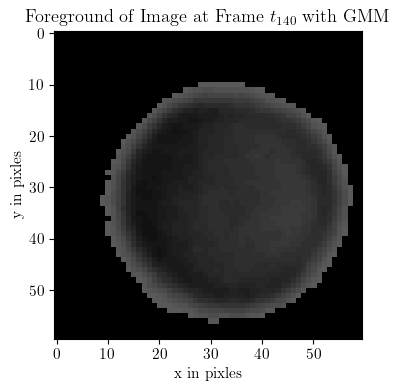

In [11]:
fig=plt.figure()
fig.set_size_inches(10,4) 
ax = fig.gca()
plt.rcParams["figure.figsize"] = (10,4)
plt.title("Foreground of Image at Frame $t_{140}$ with GMM")
plt.xlabel("x in pixles")
plt.ylabel("y in pixles")
plt.imshow(A, cmap="gray",vmin=100,vmax=160)
plt.show()
ax.set_rasterized(True)

In [12]:
y,x=np.unravel_index(np.arange(mask.size)[mask.reshape(-1)==1],(2048,2048))



In [13]:
data=np.array([x,y]).T

In [14]:
data=data[data[:,1]>30,:]
data

array([[1065,  116],
       [1066,  116],
       [1067,  116],
       ...,
       [ 360, 1695],
       [ 350, 1696],
       [ 351, 1696]])

In [15]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(data)
labels=kmeans.labels_.reshape((-1))
means=kmeans.cluster_centers_.reshape((-1,2))

In [16]:
d1=np.linalg.norm(data-means[:1,:],axis=1)
d2=np.linalg.norm(data-means[1:,:],axis=1)

index_1=d1<=d2

In [17]:
R_1=round(np.sqrt(np.sum(index_1)/np.pi))
R_2=round(np.sqrt(np.sum(index_1==0)/np.pi))

In [18]:
print(R_1)
print(R_2)

24
21


In [19]:
foreground=cv.cvtColor(foreground,cv.COLOR_BGR2GRAY)

In [20]:
x_1=round(means[0,0])
x_2=round(means[1,0])
y_1=round(means[0,1])
y_2=round(means[1,1])

In [21]:
I_1=foreground[y_1-R_1:y_1+R_1+1,x_1-R_1:x_1+R_1+1]
I_2=foreground[y_2-R_2:y_2+R_2+1,x_2-R_2:x_2+R_2+1]
center_x = I_1.shape[1] // 2
center_y = I_1.shape[0] // 2

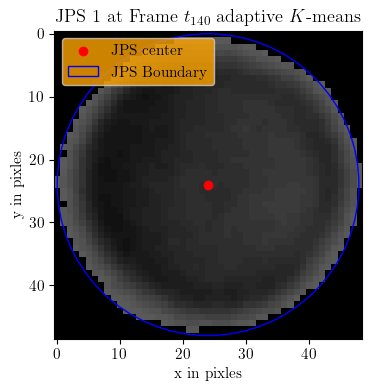

In [22]:
fig=plt.figure()
fig.set_size_inches(10,4) 
ax = fig.gca()
plt.rcParams["figure.figsize"] = (10,4)
plt.title("JPS $1$ at Frame $t_{140}$ adaptive $K$-means")
plt.xlabel("x in pixles")
plt.ylabel("y in pixles")
plt.imshow(I_1, cmap="gray",vmin=100,vmax=160)
plt.scatter(center_x, center_y, color='red',label="JPS center")
circle = plt.Circle((center_x, center_y), R_1, color='blue', fill=False, lw=1, label="JPS Boundary")
# Add the circle to the plot
ax.add_patch(circle)
# Set plot aspect ratio to be equal
ax.legend(frameon=True, facecolor="orange",loc="upper left")
ax.set_rasterized(True)
fig.savefig('../export_graphs/foreground_k_means_image1.eps', format="eps", dpi=1200, bbox_inches="tight")

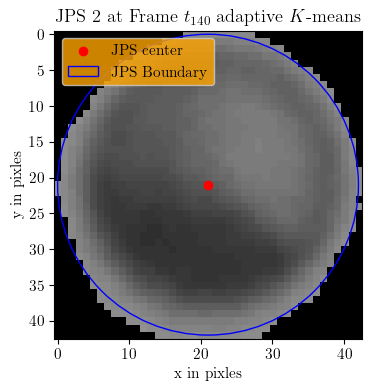

In [23]:
center_x = I_2.shape[1] // 2
center_y = I_2.shape[0] // 2
fig=plt.figure()
fig.set_size_inches(10,4) 
ax = fig.gca()
plt.rcParams["figure.figsize"] = (10,4)
plt.title("JPS $2$ at Frame $t_{140}$ adaptive $K$-means")
plt.xlabel("x in pixles")
plt.ylabel("y in pixles")
plt.imshow(I_2, cmap="gray",vmin=100,vmax=160)
plt.scatter(center_x, center_y, color='red',label="JPS center")
circle = plt.Circle((center_x, center_y), R_2, color='blue', fill=False, lw=1, label="JPS Boundary")
# Add the circle to the plot
ax.add_patch(circle)
# Set plot aspect ratio to be equal
ax.legend(frameon=True, facecolor="orange",loc="upper left")
ax.set_rasterized(True)
fig.savefig('../export_graphs/foreground_k_means_image2.eps', format="eps", dpi=1200, bbox_inches="tight")

# hough maybe

In [24]:
R_1=40
R_2=40

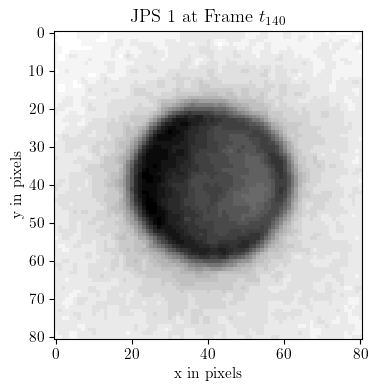

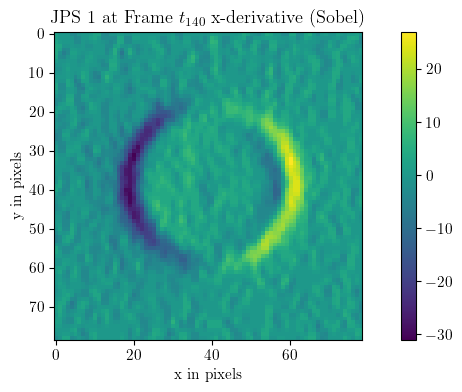

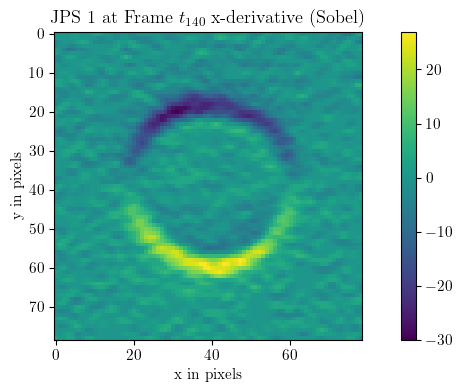

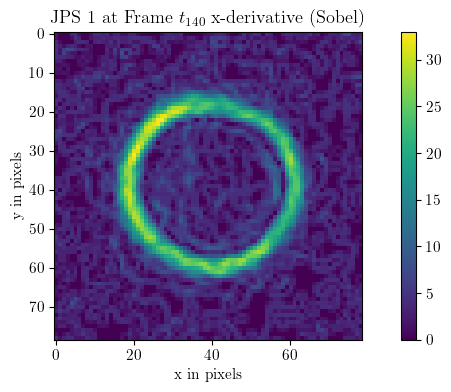

In [31]:
image=cv.GaussianBlur(cv.cvtColor(im,cv.COLOR_BGR2GRAY), ksize=(3,3),sigmaX=0)

im_obj_blurred_1=image[y_1-R_1:y_1+R_1+1,x_1-R_1:x_1+R_1+1]

im_obj_blurred=im_obj_blurred_1.astype(np.float32)
Ix=ndimage.sobel(im_obj_blurred, 1, mode="constant") 
Ix=Ix[1:-1,1:-1]
Iy=ndimage.sobel(im_obj_blurred, 0, mode="constant")
Iy=Iy[1:-1,1:-1]

I_magn_1=np.sqrt(Ix**2+Iy**2)
I_theta_1 = np.arctan2(Iy, Ix)

fig=plt.figure()
plt.rcParams["figure.figsize"] = (10,4)
ax = fig.gca()
plt.title("JPS $1$ at Frame $t_{140}$")
plt.xlabel("x in pixels")
plt.ylabel("y in pixels")
plt.imshow(im_obj_blurred,cmap="gray")
plt.show()
fig.savefig('../export_graphs/original_JPS1.eps', format="eps", dpi=1200, bbox_inches="tight")

fig=plt.figure()
plt.rcParams["figure.figsize"] = (10,4)
ax = fig.gca()
plt.title("JPS $1$ at Frame $t_{140}$ x-derivative (Sobel)")
plt.xlabel("x in pixels")
plt.ylabel("y in pixels")
plt.imshow(Ix)
plt.colorbar()
plt.show()
fig.savefig('../export_graphs/sobelx_image1.eps', format="eps", dpi=1200, bbox_inches="tight")

fig=plt.figure()
plt.rcParams["figure.figsize"] = (10,4)
ax = fig.gca()
plt.title("JPS $1$ at Frame $t_{140}$ x-derivative (Sobel)")
plt.xlabel("x in pixels")
plt.ylabel("y in pixels")
plt.imshow(Iy)
plt.colorbar()
plt.show()
fig.savefig('../export_graphs/sobely_image1.eps', format="eps", dpi=1200, bbox_inches="tight")


fig=plt.figure()
plt.rcParams["figure.figsize"] = (10,4)
ax = fig.gca()
plt.title("JPS $1$ at Frame $t_{140}$ x-derivative (Sobel)")
plt.xlabel("x in pixels")
plt.ylabel("y in pixels")
plt.imshow(np.sqrt(Iy**2+Ix**2))
plt.colorbar()
plt.show()
fig.savefig('../export_graphs/sobelmagn_image1.eps', format="eps", dpi=1200, bbox_inches="tight")


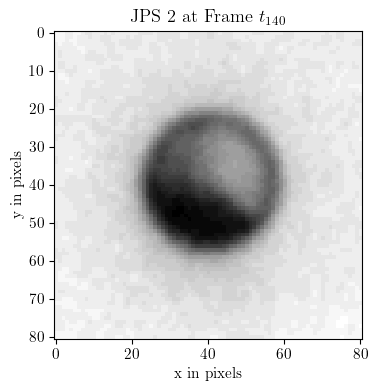

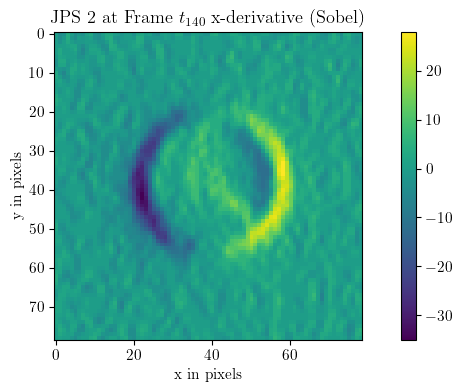

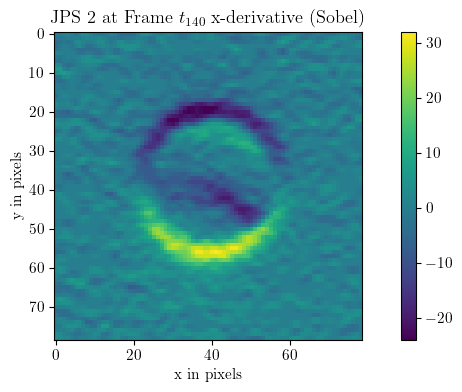

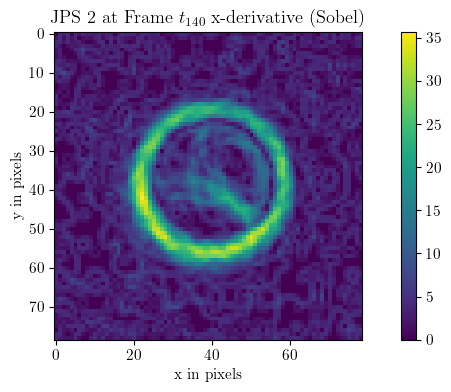

In [32]:
image=cv.GaussianBlur(cv.cvtColor(im,cv.COLOR_BGR2GRAY), ksize=(3,3),sigmaX=0)

im_obj_blurred_2=image[y_2-R_2:y_2+R_2+1,x_2-R_2:x_2+R_2+1]

im_obj_blurred=im_obj_blurred_2.astype(np.float32)
Ix=ndimage.sobel(im_obj_blurred, 1, mode="constant") 
Ix=Ix[1:-1,1:-1]
Iy=ndimage.sobel(im_obj_blurred, 0, mode="constant")
Iy=Iy[1:-1,1:-1]
I_magn_2=np.sqrt(Ix**2+Iy**2)
I_theta_2 = np.arctan2(Iy, Ix)

fig=plt.figure()
plt.rcParams["figure.figsize"] = (10,4)
ax = fig.gca()
plt.title("JPS $2$ at Frame $t_{140}$")
plt.xlabel("x in pixels")
plt.ylabel("y in pixels")
plt.imshow(im_obj_blurred,cmap="gray")
plt.show()
fig.savefig('../export_graphs/original_JPS2.eps', format="eps", dpi=1200, bbox_inches="tight")

fig=plt.figure()
plt.rcParams["figure.figsize"] = (10,4)
ax = fig.gca()
plt.title("JPS $2$ at Frame $t_{140}$ x-derivative (Sobel)")
plt.xlabel("x in pixels")
plt.ylabel("y in pixels")
plt.imshow(Ix)
plt.colorbar()
plt.show()
fig.savefig('../export_graphs/sobelx_image2.eps', format="eps", dpi=1200, bbox_inches="tight")

fig=plt.figure()
plt.rcParams["figure.figsize"] = (10,4)
ax = fig.gca()
plt.title("JPS $2$ at Frame $t_{140}$ x-derivative (Sobel)")
plt.xlabel("x in pixels")
plt.ylabel("y in pixels")
plt.imshow(Iy)
plt.colorbar()
plt.show()
fig.savefig('../export_graphs/sobely_image2.eps', format="eps", dpi=1200, bbox_inches="tight")


fig=plt.figure()
plt.rcParams["figure.figsize"] = (10,4)
ax = fig.gca()
plt.title("JPS $2$ at Frame $t_{140}$ x-derivative (Sobel)")
plt.xlabel("x in pixels")
plt.ylabel("y in pixels")
plt.imshow(np.sqrt(Iy**2+Ix**2))
plt.colorbar()
plt.show()
fig.savefig('../export_graphs/sobelmagn_image2.eps', format="eps", dpi=1200, bbox_inches="tight")


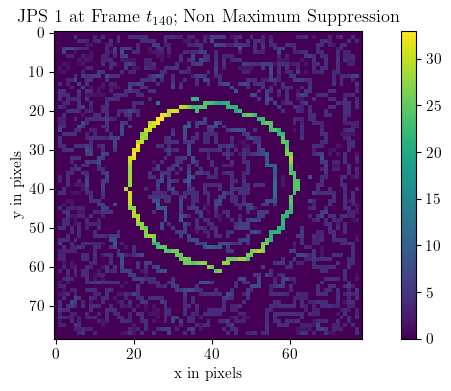

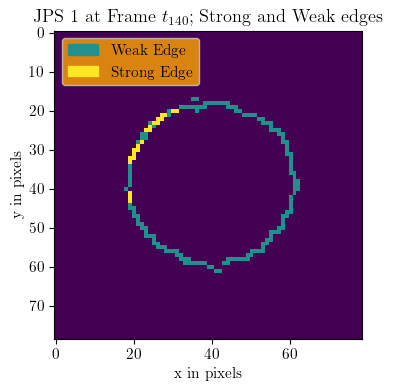

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


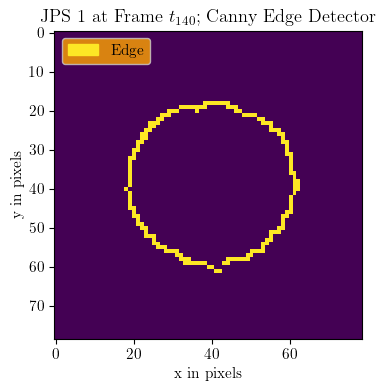

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [33]:
thinned_edges_1=non_max_suppression(I_theta=I_theta_1, I_magn=I_magn_1)
fig=plt.figure()
plt.rcParams["figure.figsize"] = (10,4)
ax = fig.gca()
plt.title("JPS $1$ at Frame $t_{140}$; Non Maximum Suppression")
plt.xlabel("x in pixels")
plt.ylabel("y in pixels")
plt.imshow(thinned_edges_1)
plt.colorbar()
plt.show()
fig.savefig('../export_graphs/thinned_edge_image1.eps', format="eps", dpi=1200, bbox_inches="tight")

thresh_strong=30
thresh_weak=15
pixel_strength=np.zeros(thinned_edges_1.shape,dtype=np.uint8)
pixel_strength[(thresh_weak<=thinned_edges_1) & (thresh_strong>thinned_edges_1)]=1
pixel_strength[(thresh_strong<=thinned_edges_1)]=2
Edges=hysteresis_tracking(pixel_strength)


plt.rcParams["figure.figsize"] = (10,4)
fig=plt.figure()

ax = fig.gca()
ax = fig.gca()
cmap = plt.cm.viridis
color_middle = cmap(0.5)  # Middle value
color_end = cmap(1.0)     # Maximum value
# Create custom patches for the legend
patch_middle = mpatches.Patch(color=color_middle, label='Weak Edge')
patch_end = mpatches.Patch(color=color_end, label='Strong Edge')
# Create legend with custom patches
ax.legend(handles=[patch_middle, patch_end],frameon=True, facecolor="orange",loc="upper left")
plt.title("JPS $1$ at Frame $t_{140}$; Strong and Weak edges")
plt.xlabel("x in pixels")
plt.ylabel("y in pixels")
plt.imshow(pixel_strength)
plt.show()
fig.savefig('../export_graphs/pixel_strength_1.eps', format="eps", dpi=1200, bbox_inches="tight")

plt.rcParams["figure.figsize"] = (10,4)
fig=plt.figure()
ax = fig.gca()
plt.title("JPS $1$ at Frame $t_{140}$; Canny Edge Detector")
plt.xlabel("x in pixels")
plt.ylabel("y in pixels")
plt.imshow(Edges)
patch_end = mpatches.Patch(color=color_end, label='Edge')
# Create legend with custom patches
ax.legend(handles=[patch_end],frameon=True, facecolor="orange",loc="upper left")
plt.show()
fig.savefig('../export_graphs/canny_edges_1.eps', format="eps", dpi=1200, bbox_inches="tight")

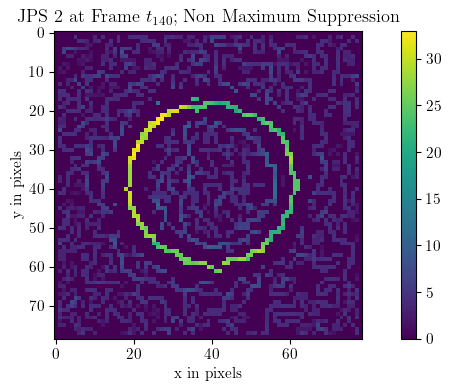

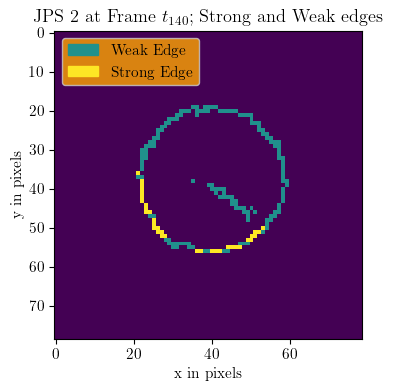

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


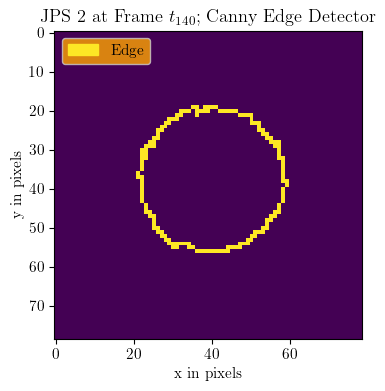

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [34]:
thinned_edges_2=non_max_suppression(I_theta=I_theta_2, I_magn=I_magn_2)
fig=plt.figure()
plt.rcParams["figure.figsize"] = (10,4)
ax = fig.gca()
plt.title("JPS $2$ at Frame $t_{140}$; Non Maximum Suppression")
plt.xlabel("x in pixels")
plt.ylabel("y in pixels")
plt.imshow(thinned_edges_1)
plt.colorbar()
plt.show()
fig.savefig('../export_graphs/thinned_edge_image2.eps', format="eps", dpi=1200, bbox_inches="tight")

thresh_strong=30
thresh_weak=15
pixel_strength=np.zeros(thinned_edges_2.shape,dtype=np.uint8)
pixel_strength[(thresh_weak<=thinned_edges_2) & (thresh_strong>thinned_edges_2)]=1
pixel_strength[(thresh_strong<=thinned_edges_2)]=2
Edges=hysteresis_tracking(pixel_strength)


plt.rcParams["figure.figsize"] = (10,4)
fig=plt.figure()
ax = fig.gca()
cmap = plt.cm.viridis
color_middle = cmap(0.5)  # Middle value
color_end = cmap(1.0)     # Maximum value
# Create custom patches for the legend
patch_middle = mpatches.Patch(color=color_middle, label='Weak Edge')
patch_end = mpatches.Patch(color=color_end, label='Strong Edge')
# Create legend with custom patches
plt.legend(handles=[patch_middle, patch_end],frameon=True, facecolor="orange",loc="upper left")
plt.title("JPS $2$ at Frame $t_{140}$; Strong and Weak edges")
plt.xlabel("x in pixels")
plt.ylabel("y in pixels")
plt.imshow(pixel_strength)
plt.show()
fig.savefig('../export_graphs/pixel_strength_2.eps', format="eps", dpi=1200, bbox_inches="tight")

plt.rcParams["figure.figsize"] = (10,4)
fig=plt.figure()
ax = fig.gca()
plt.title("JPS $2$ at Frame $t_{140}$; Canny Edge Detector")
plt.xlabel("x in pixels")
plt.ylabel("y in pixels")
plt.imshow(Edges)
patch_end = mpatches.Patch(color=color_end, label='Edge')
# Create legend with custom patches
plt.legend(handles=[patch_end],frameon=True, facecolor="orange",loc="upper left")
plt.show()
fig.savefig('../export_graphs/canny_edges_2.eps', format="eps", dpi=1200, bbox_inches="tight")

[41.5 40.5 20.8]


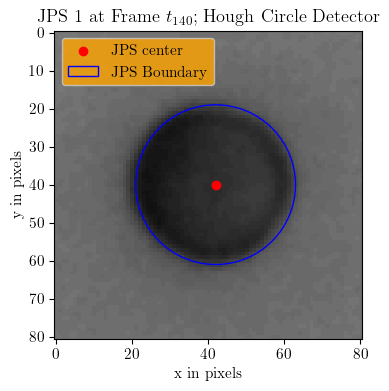

In [35]:

# dp is inverse ratio of the accumulator resolution to the image resolution
# small dp means higher accurate voting (e.g. cirlce values raidus center have more discrete values)
# big dp more likely it is to e.g. miss slightly degenerated circles or detect multiple circles instead of one with a big edge
dp=1
min_dist=10
min_radius=5
max_radius=30
im_original=cv.cvtColor(im,cv.COLOR_BGR2GRAY)
im_original_1=im_original[y_1-R_1:y_1+R_1+1,x_1-R_1:x_1+R_1+1]

circles = cv.HoughCircles(im_original_1.astype(np.uint8), cv.HOUGH_GRADIENT, dp=dp, minDist=min_dist, param1=thresh_strong, param2=thresh_weak, minRadius=min_radius, maxRadius=max_radius)
circles=np.squeeze(circles)
print(circles)
center_x=round(circles[0])
center_y=round(circles[1])
r_1=round(circles[-1])


plt.rcParams["figure.figsize"] = (10,4)
fig=plt.figure()
ax = fig.gca()
plt.title("JPS $1$ at Frame $t_{140}$; Hough Circle Detector")
plt.xlabel("x in pixels")
plt.ylabel("y in pixels")
plt.imshow(im_obj_blurred_1, cmap="gray", vmin=100,vmax=160)
plt.scatter(center_x, center_y, color='red',label="JPS center")
circle = plt.Circle((center_x, center_y), r_1, color='blue', fill=False, lw=1, label="JPS Boundary")
# Add the circle to the plot
ax.add_patch(circle)
# Set plot aspect ratio to be equal
ax.legend(frameon=True, facecolor="orange",loc="upper left")
ax.set_rasterized(True)
plt.show()
fig.savefig('../export_graphs/hough_1.eps', format="eps", dpi=1200, bbox_inches="tight")


[41.5 38.5 18.2]


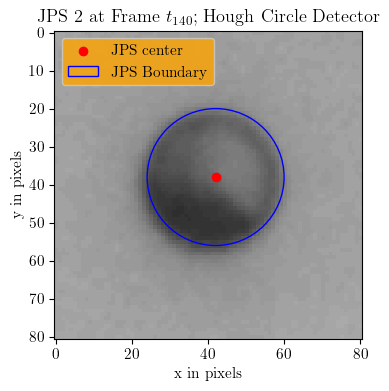

In [36]:

# dp is inverse ratio of the accumulator resolution to the image resolution
# small dp means higher accurate voting (e.g. cirlce values raidus center have more discrete values)
# big dp more likely it is to e.g. miss slightly degenerated circles or detect multiple circles instead of one with a big edge
dp=1
min_dist=10
min_radius=5
max_radius=30
im_original=cv.cvtColor(im,cv.COLOR_BGR2GRAY)
im_original_2=im_original[y_2-R_2:y_2+R_2+1,x_2-R_2:x_2+R_2+1]

circles = cv.HoughCircles(im_original_2.astype(np.uint8), cv.HOUGH_GRADIENT, dp=dp, minDist=min_dist, param1=thresh_strong, param2=thresh_weak, minRadius=min_radius, maxRadius=max_radius)
circles=np.squeeze(circles)
print(circles)
center_x=round(circles[0])
center_y=round(circles[1])
r_2=round(circles[-1])


plt.rcParams["figure.figsize"] = (10,4)
fig=plt.figure()
ax = fig.gca()
plt.title("JPS $2$ at Frame $t_{140}$; Hough Circle Detector")
plt.xlabel("x in pixels")
plt.ylabel("y in pixels")
plt.imshow(im_obj_blurred_2, cmap="gray", vmin=100,vmax=160)
plt.scatter(center_x, center_y, color='red',label="JPS center")
circle = plt.Circle((center_x, center_y), r_2, color='blue', fill=False, lw=1, label="JPS Boundary")
# Add the circle to the plot
ax.add_patch(circle)
# Set plot aspect ratio to be equal
ax.legend(frameon=True, facecolor="orange",loc="upper left")
ax.set_rasterized(True)
plt.show()
fig.savefig('../export_graphs/hough_2.eps', format="eps", dpi=1200, bbox_inches="tight")
